In [ ]:
import requests
import json
import pprint
import pandas as pd
import numpy
import matplotlib.pyplot as plt

response = requests.get("https://data.ntpc.gov.tw/api/datasets/71CD1490-A2DF-4198-BEF1-318479775E8A/json")
content = response.content
json_tree = json.loads(content)
pprint.pprint(json_tree)

for bike_rent_records in json_tree:
    leftRatio = float(bike_rent_records["sbi"]) / float(bike_rent_records["tot"]) * 100
    print("ID:{0} Left:{2:0.1f}% Name:{1}".format(bike_rent_records["sno"], bike_rent_records["aren"], leftRatio))

In [ ]:
dataframe = pd.DataFrame(json_tree)

In [ ]:
dataframe

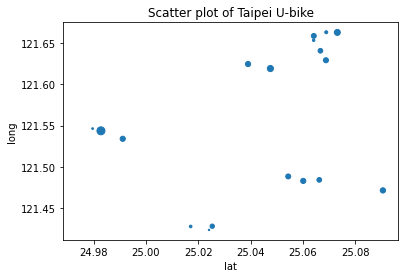

In [ ]:
dataframe['lat']=dataframe['lat'].astype(float)
dataframe['lng']=dataframe['lng'].astype(float)
dataframe['sbi']=dataframe['sbi'].astype(float)
w = dataframe['lat']
v = dataframe['lng']
k = dataframe['sbi']
plt.scatter(w, v, k)
plt.title('Scatter plot of Taipei U-bike')
plt.xlabel('lat')
plt.ylabel('long')
plt.show()

In [ ]:
import folium
from folium.plugins import MarkerCluster
import numpy as np
import matplotlib.pyplot as plt
import descartes
u_bike = folium.Map(location= [25.0330, 121.5654], zoom_start=10)
u_bike

In [ ]:
dataframe['sbi']=dataframe['sbi'].astype(str)
for i in range(0,20):
  folium.Marker([dataframe['lat'][i], dataframe['lng'][i]], popup= dataframe['sbi'][i]). add_to(u_bike)
u_bike